Algoritmos

In [3]:
'''
Implemente três algoritmos para realizar a *ordenação de um array de elementos*: 
MergeSort, QuickSort com *Lomuto Partition* e QuickSort com *Hoare Partition*. 
Os algoritmos QuickSort devem ser *in place*
Todos os algoritmos devem ser implementados em Python (sem utilizar nenhuma biblioteca externa). 
Todos eles devem receber como parâmetro uma lista de elementos e ordenar esta lista. 
Você também deve montar um experimento que permita comparar o desempenho dos três algoritmos 
através de um gráfico (tempo de execução para diferentes tamanhos do array).
Você deve entregar um arquivo PDF contendo os algoritmos implementados e um gráfico comparando o desempenho dos mesmos.

# algoritmo com Hoare´s embutido.
def quickSort(A, i, j):
    if i < j:
        l=i                                        #<-- HoaresPartition Início
        p=j 
        r=j-1
        while (l <= r):
            while (l <= r) and (A[l] < A[p]):
                l=l+1
            while (l <= r) and (A[r] > A[p]):
                r=r-1
            if l<=r:
                swap(A,l,r)
                l=l+1
                r=r-1
        swap(A,l,p)                                #<-- HoaresPartition Fim
        QuickSort(A, i, l-1)
        QuickSort(A, l+1, j)
'''
### Inicio dos utilitários #####################################################
def swap(A, i, j):
    tmp=A[i]
    A[i]=A[j]
    A[j]=tmp
    
### Inicio do Bloco MergeSort ##################################################
def merge(A, L, R):
    li=0
    ri=0
    for i in range(0, len(A)):
        if li >= len(L):
            A[i]=R[ri]
            ri=ri+1
        elif ri >= len(R):
            A[i]=L[li]
            li=li+1
        else:
            if(L[li] < R[ri]):
                A[i]=L[li]
                li=li+1
            else:
                A[i]=R[ri]
                ri=ri+1

def mergeSort(A):
    if len(A) > 1:
        L = A[0:len(A)//2]
        R = A[len(A)//2:len(A)]
        mergeSort(L)
        mergeSort(R)
        merge(A, L, R)
### Fim do Bloco MerdeSort #####################################################

### Inicio do Bloco QuickSort usando Hoare´s ###################################
def hoaresPartition(A, i, j):
        l=i                                        #<-- HoaresPartition Início
        p=j 
        r=j-1
        while (l <= r):
            while (l <= r) and (A[l] < A[p]):
                l=l+1
            while (l <= r) and (A[r] > A[p]):
                r=r-1
            if l <= r:
                swap(A, l, r)
                l=l+1
                r=r-1
        swap(A, l, p)                               #<-- HoaresPartition Fim
        return l                            

def hoaresSort(A, l, r):
    if l < r:
        p=hoaresPartition(A, l, r)    
        hoaresSort(A, l, p-1)                   
        hoaresSort(A, p+1, r)                   

def hoaresQuickSort(A):
    if len(A) > 0:
        l=0
        r=len(A)-1
        hoaresSort(A, l, r)
### Fim do Bloco QuickSort usando Hoare´s ######################################
 
### Início do Bloco QuickSort usando Lomuto ####################################
def lomutoPartition(A, l, r):
    p=A[l]
    s=l
    for i in range(l+1, r+1):   
        if A[i] < p: 
            s=s+1
            swap(A, s, i)
    swap(A, l, s)
    return s 

def lomutoSort(A, i, j):
    if i < j:
        l=lomutoPartition(A, i, j)
        lomutoSort(A, i, l-1)
        lomutoSort(A, l+1, j)
        return A  

def lomutoQuickSort(A):
    if len(A) > 0:
        l=0
        r=len(A)-1
        return lomutoSort(A, l, r) 
### Fim do Bloco QuickSort usando Lomuto #######################################


In [ ]:
### bloco dos testes ###########################################################
print("testenado...")
import random
vetor = list(range(0,1001))
random.shuffle(vetor)
################################################################################
V0  = vetor
V1 = [1,3,8,2,9,0,7,4,6,5]
V2 = [8,9,5,7,11,2,1]
################################################################################
V =  [8,9,5,7,11,2,1] 
print("Lista desordenada.................:", V)
mergeSort(V)
print("Lista ordenada mergeSort..........:", V)
print("")
################################################################################
V =  [8,9,5,7,11,2,1] 
print("Lista desordenada.................:", V)
hoaresQuickSort(V)
print("Lista ordenada hoaresQuickSort....:", V)
print("")
################################################################################
V =  [8,9,5,7,11,2,1] 
print("Lista desordenada.................:", V)
lomutoQuickSort(V)
print("Lista ordenada lomutoQuickSort....:", V)
print("")
################################################################################

testenado...
Lista desordenada.................: [8, 9, 5, 7, 11, 2, 1]
Lista ordenada mergeSort..........: [1, 2, 5, 7, 8, 9, 11]

Lista desordenada.................: [8, 9, 5, 7, 11, 2, 1]
Lista ordenada hoaresQuickSort....: [1, 2, 5, 7, 8, 9, 11]

Lista desordenada.................: [8, 9, 5, 7, 11, 2, 1]
Lista ordenada lomutoQuickSort....: [1, 2, 5, 7, 8, 9, 11]



Coleta de dados dos experimentos

In [5]:
import time
from numpy import random

def avg_time(domain, tam, func, rounds): 
  sum = float(0)
  for i in range(rounds):
    #create a list with random numbers
    random.seed(i)
    L=list(random.randint(tam+domain,size=tam))
    start = time.time()    
    func(L)
    end = time.time()
    sum += end-start
    '''
    O assert é uma verificação em tempo de execução de uma condição qualquer. 
    Se a condição não for verdadeira, uma exceção AssertionError 
    acontece e o programa pára.
    '''
    assert L==sorted(L)
  return sum/rounds

#Você deve escolher um domínio mais adequado
DOMAIN = 1000000000

#defines the number of times each algorithm will be processed to find the average time
num_rounds = 400 

##você deve escolher tamanhos mais adequados
sizes = [1000, 2000, 3000, 4000, 5000] 

#defines the algorithms to be processed
algorithms = [mergeSort, lomutoQuickSort, hoaresQuickSort ]

mapSizeToTime = dict()

for i in range(5):
  print(f"Starting round {i+1}, size={sizes[i]}")
  
  ##Map list size to algorithm average time
  for algorithm in algorithms:      
    mapSizeToTime[f"{algorithm.__name__ }##{sizes[i]}"] = avg_time(DOMAIN, sizes[i], algorithm, num_rounds)
  
print(f"Finish data collection")

Starting round 1, size=1000
Starting round 2, size=2000
Starting round 3, size=3000
Starting round 4, size=4000
Starting round 5, size=5000
Finish data collection


Formata os dados do experimento para serem exibidos

In [ ]:
import pandas as pd
df = pd.DataFrame.from_dict(mapSizeToTime, orient='index',columns=['Time'])
df['Algorithm'] = [i.split("##")[0] for i in df.index]
df['Size'] = [int(i.split("##")[1]) for i in df.index]
df

,Time,Algorithm,Size
mergeSort##1000,0.004590,mergeSort,1000
lomutoQuickSort##1000,0.002953,lomutoQuickSort,1000
hoaresQuickSort##1000,0.002741,hoaresQuickSort,1000
mergeSort##2000,0.010049,mergeSort,2000
lomutoQuickSort##2000,0.006609,lomutoQuickSort,2000
hoaresQuickSort##2000,0.006208,hoaresQuickSort,2000
mergeSort##3000,0.015746,mergeSort,3000
lomutoQuickSort##3000,0.010420,lomutoQuickSort,3000
hoaresQuickSort##3000,0.009744,hoaresQuickSort,3000
mergeSort##4000,0.021726,mergeSort,4000


Resultado do experimento (gráfico)

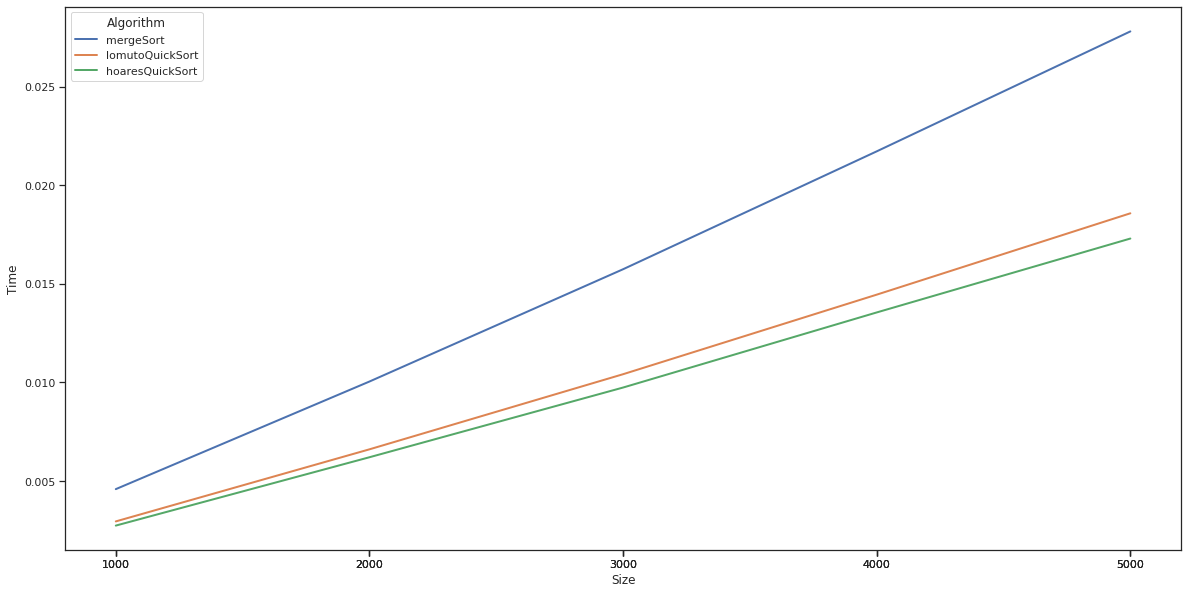

In [ ]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

##Defines font size and line width
sns.set(font_scale=1, style="ticks", rc={"lines.linewidth": 2})

##Defines plot size
plt.rcParams['figure.figsize'] = [20, 10]

g = sns.lineplot(x='Size', y='Time', hue='Algorithm', data=df)
#g.set_yscale('log') #escala logartimca, mais indicada quando a diferença entre os algoritimos comparados são muito distantes ou muito perto.
g.set(xticks=[i for i in df.Size])
plt.show()